# <a id='toc1_'></a>[Exam Project](#toc0_)


**Table of contents**<a id='toc0_'></a>    
- [Exam Project](#toc1_)    
  - [Problem 1: Optimal taxation with government consumption](#toc1_1_)    
    - [Question 1](#toc1_1_1_)    
    - [Question 2](#toc1_1_2_)    
    - [Question 3](#toc1_1_3_)    
    - [Question 4](#toc1_1_4_)    
    - [Question 5](#toc1_1_5_)    
    - [Question 6](#toc1_1_6_)    
  - [Problem 2: Labor adjustments costs](#toc1_2_)    
    - [Question 1](#toc1_2_1_)    
    - [Question 2](#toc1_2_2_)    
    - [Question 3](#toc1_2_3_)    
    - [Question 4](#toc1_2_4_)    
    - [Question 5](#toc1_2_5_)    
  - [Problem 3: Global optimizer with refined multi-start](#toc1_3_)    
    - [Question 1](#toc1_3_1_)    
    - [Question 2](#toc1_3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Import of libraries**


We import the libraries that we will use in the project.

* Along with the nessesary libraries we also import the functions from the [examproject.py](examproject.py) file, and import the module as `ep`.

* We then initialize the class `TaxModel` as tax and set the parameters for the model by running the `set_values` function from the class.

* All the functions used in this notebook are throughly documented in the [examproject.py](examproject.py) file.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import sympy as sm
from IPython.display import display
from types import SimpleNamespace
import examproject as ep

%load_ext autoreload
%autoreload 2

%matplotlib inline

-----

## <a id='toc1_1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

### <a id='toc1_1_1_'></a>[Question 1](#toc0_)

Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.



We solve the model using sympy and verify the optimal labor supply choice using the function `analytical_solution` from [examproject.py](examproject.py).

In [2]:
sol = ep.analytical_sol(do_print = True)

Eq(L^*, -kappa/(2*wtilde) + sqrt(4*alpha*wtilde**2 + kappa**2*nu)/(2*sqrt(nu)*wtilde))

Though sympy simplifies the problem sligthly differently, this is equialvent to

$$
L^* = \frac{-\kappa + \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}
$$

As should be verified.

### <a id='toc1_1_2_'></a>[Question 2](#toc0_)

Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

We initialize the class `TaxModel` as TaxModel and set the parameters for the model by running the `set_values` function from the class.

We call the `labour_plot` function defined in the [examproject.py](examproject.py) file, and plot the the Labour on the y-axis and the wage on the x-axis. Labour growth stagnates as wage approaches 1.

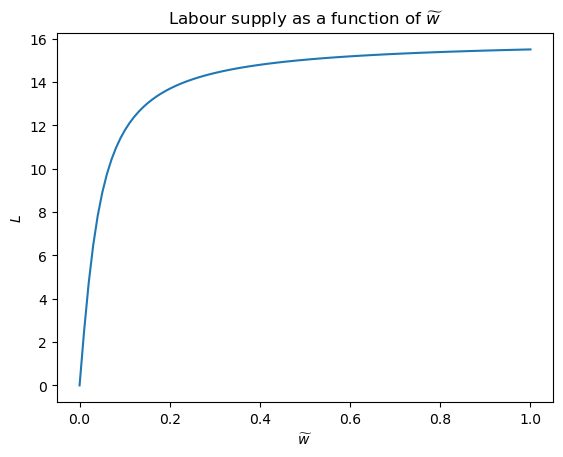

In [3]:
# a. initiate model and set values
TaxModel = ep.TaxModel()
TaxModel.set_values()

# b. plot the labour supply
TaxModel.labour_plot()



### <a id='toc1_1_3_'></a>[Question 3](#toc0_)

We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


We call the `tax_plot` function from the TaxModel class. The function plots the tax rate on the x-axis and the labour, government consumption and worker utility on the y-axis across 3 subplots. Each plot show the development of the variable across different levels of the tax rate. Evidently a higher tax rate leads to a lower labour supply, a higher government consumption *(not after 82%)* and a lower utility for the worker.

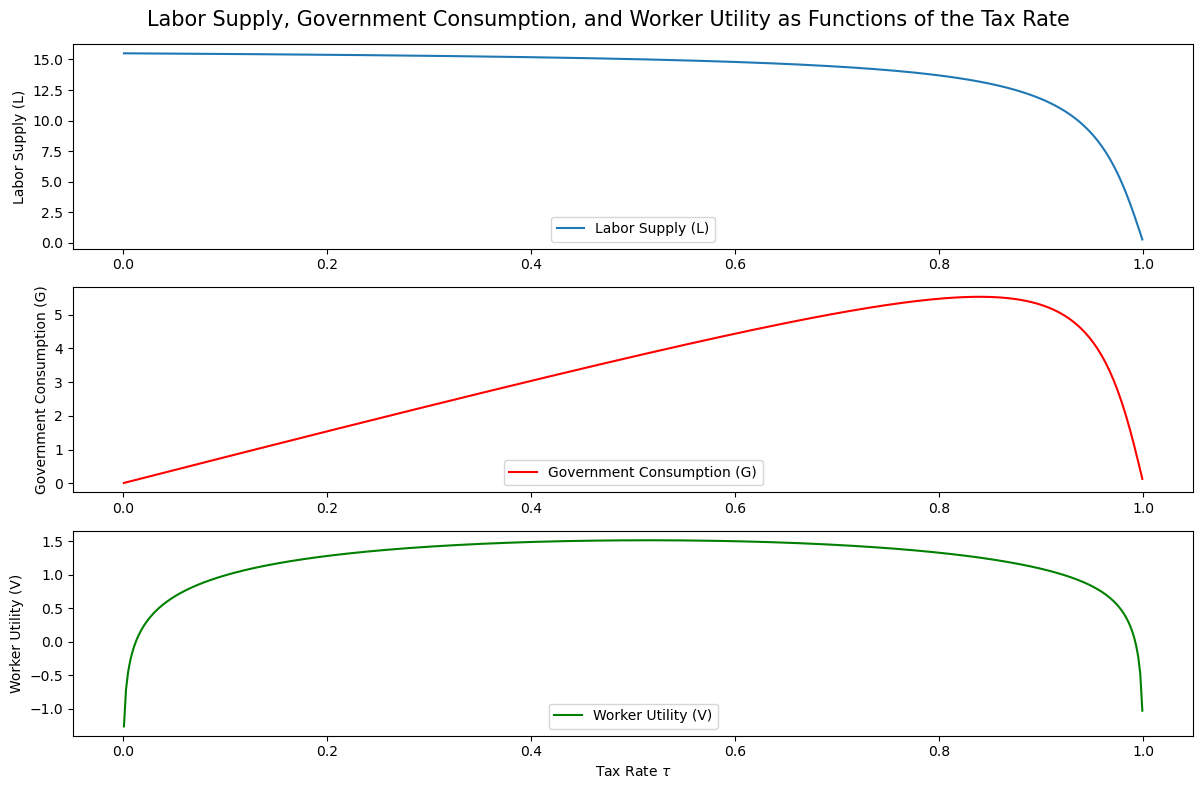

In [4]:
TaxModel.tax_plot()

### <a id='toc1_1_4_'></a>[Question 4](#toc0_)

Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The socially optimal tax is found by calling the function `optimal_tax` from the TaxModel class. The function uses the `scipy.optimize.minimize` function to find the optimal tax rate. Below is a curve with the worker utility on the y-axis and the tax rate on the x-axis. The optimal tax rate is found to be $51.45\%$. Additionally a black vertical line is drawn at the optimal tax rate to further illustrate the result. 

The optimal tax rate is 0.5145.


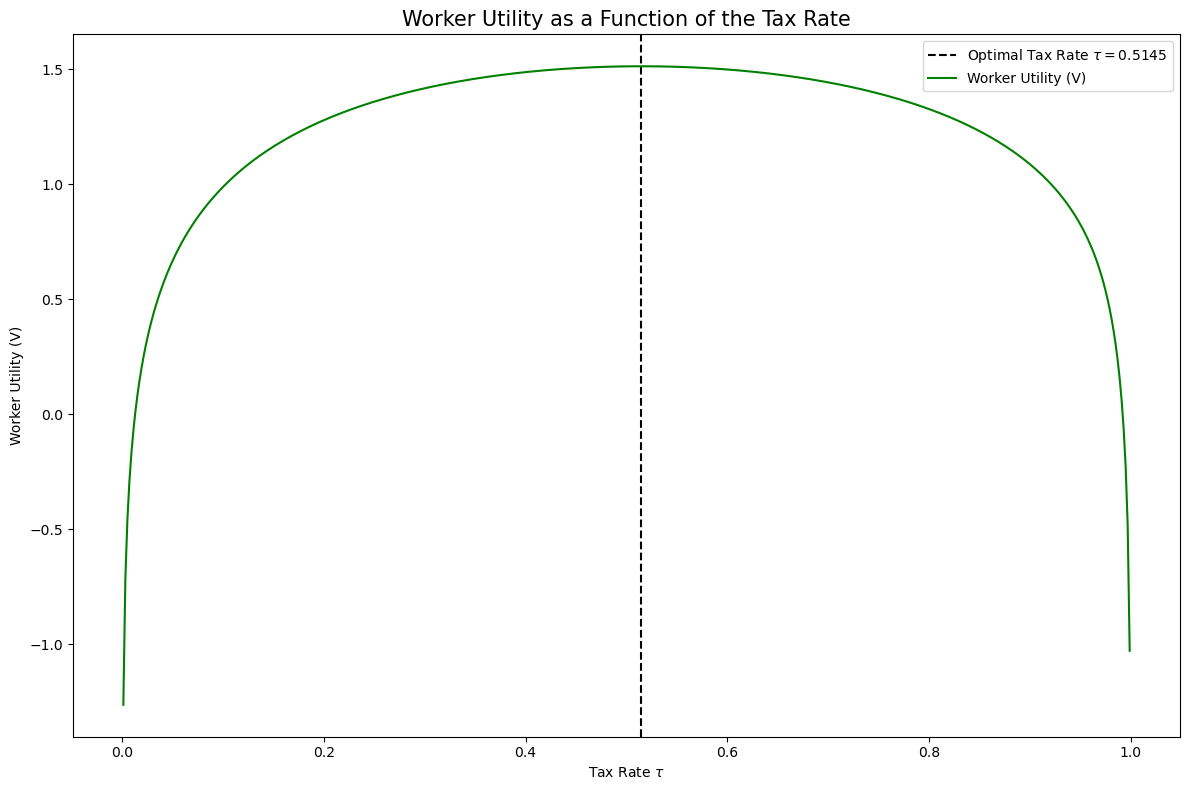

In [5]:
opt_tax = TaxModel.optimal_tax(do_print = True, do_plot=True)

### <a id='toc1_1_5_'></a>[Question 5](#toc0_)

Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

To find the G that solves $G = \tau w L^{\star}((1-\tau)w,G)$ and by using the optimal tax rate from question 4, we utilize the `gov_opt` function which internally solves the worker problem and returns the optimal government consumption for each of the two parameter sets.  

The parameter sets are given as: 
* **Set 1:**  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
* **Set 2:**  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

The function takes three positional arguments, sigma, rho, tau.
1. $\sigma$:    The elasticity of substitution between private and public consumption.
2. $\rho$:      The coefficient of relative risk aversion.
3. $\tau$:      The tax rate. The optimal tax rate from question 4 is used.


The optimal government spending is found to be $\underline{7.7112}$ and $\underline{4.9752}$  respectively. We find higher elasticity of substitution and risk aversion to result in lower government spending, as illustrated in the results below.

In [6]:
gov_spend1 = TaxModel.gov_opt(1.001, 1.001, opt_tax, do_print=True)
gov_spend2 = TaxModel.gov_opt(1.5, 1.5, opt_tax, do_print=True)

The optimal government spending is 7.7112.
The optimal government spending is 4.9752.


### <a id='toc1_1_6_'></a>[Question 6](#toc0_)

Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

The function `optimal_tax_ext` is used to find the socially optimal tax rate $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$. The function takes two positional arguments, sigma and rho. Again this is done for the two parameter sets, which are given in question 5. 

The optimal tax rates are found to be $51.41\%$ and $46.21\%$ respectively. A higher elasticity of substitution and risk aversion results in a lower optimal tax rate, as illustrated in the results below.

In [7]:
opt_tax1 = TaxModel.optimal_tax_ext(1.001, 1.001, do_print=True)
opt_tax2 = TaxModel.optimal_tax_ext(1.5, 1.5, do_print=True)

The optimal tax rate is 0.5141.
The optimal tax rate is 0.4621.


------------

## <a id='toc1_2_'></a>[Problem 2: Labor adjustments costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

### <a id='toc1_2_1_'></a>[Question 1](#toc0_)

Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

We initialize the class `HairModel` as HairModel and set the parameters for the model by running the `set_values` function from the class.

Secondly we plot the numerical and analytical optimum of the labour supply with `plot_l` in the `HairModel`. This solves the minimization problem for a 100 different $\kappa$ values, as well as solve the analytical solution provided in the question the the same $\kappa$ values. The numerical solution is found to be equal to the analytical solution for the invertal $\kappa\in\left\{1.0 , 2.0\right\}$, as the lines are overlapping in the plot below.

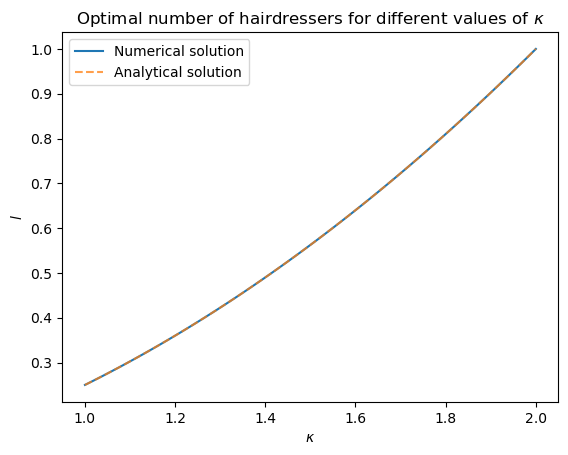

In [8]:
# a. initiat model and set values
HairModel = ep.HairModel()
HairModel.set_values()

# b. plot the labour supply
HairModel.plot_l(kappa=(1.0,2.0))

### <a id='toc1_2_2_'></a>[Question 2](#toc0_)

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$



The **ex post** value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The **ex ante** expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.

Baseline parameters are: 

$$
\begin{align*}
\rho = 0.90 \\
\iota = 0.01 \\
\sigma_{\epsilon} = 0.10 \\
R = \left(1+0.01\right)^{1/12} 
\end{align*}
$$

Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

We start by calculating $\kappa$ for as a $(K,T+1)$ matrix with $K=1000$ and $T=120$. This is done by using the `HairModel` class and the `kappa_path` function.
Next we calculate the labour supply for each $\kappa$ value using the `policy` function.
Lastly we calculate the expected value of the salon using the `ex_ante` function. The expected value of the salon is found to be $27.73$.

In [9]:
# we calculate the pat of shocks
kappa = HairModel.kappa_path()

# we calculate the labour given the policy and shocks for each period
labour = ep.policy(**HairModel.par.__dict__,kappa=kappa, Delta=0.00)

# we calculate the expected value of the salon
value = ep.ex_ante(**HairModel.par.__dict__, labour=labour, kappa=kappa, do_print=True)

The ex ante value of the salon is: 27.730190544942936


### <a id='toc1_2_3_'></a>[Question 3](#toc0_)

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.

Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

The `policy` function is already modified to handle different $\Delta$. We therefore calculate the labour supply and expected value as before. The expected value of the salon is found to be $28.41$.

In [10]:
# we calculate the labour given the policy and shocks for each period
labour = ep.policy(**HairModel.par.__dict__, kappa=kappa, Delta=0.05)

# we calculate the expected value of the salon
value = ep.ex_ante(**HairModel.par.__dict__, labour=labour, kappa=kappa, do_print=True)

The ex ante value of the salon is: 28.410320997790386


### <a id='toc1_2_4_'></a>[Question 4](#toc0_)

Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

The `optimal_delta` function is used to find the optimal $\Delta$. The optimal $\Delta$ is found to be $0.076$.

The `value_plot` function is used to plot the expected value of the salon as a function of $\Delta$. The plot is shown below.

In [11]:
optimum = ep.optimal_delta(**HairModel.par.__dict__, kappa=kappa, interval=(0,1), do_print=True)

The optimal delta is: 0.07600065809115589


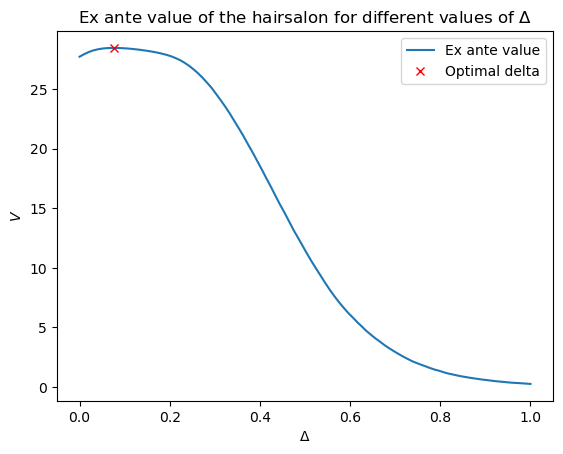

In [12]:
ep.value_plot(**HairModel.par.__dict__, kappa=kappa, interval=(0,1), optimal_delta=optimum)

### <a id='toc1_2_5_'></a>[Question 5](#toc0_)

Suggest an alternative policy you believe might improve profitability. Implement and test your policy.


------

## <a id='toc1_3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

### <a id='toc1_3_1_'></a>[Question 1](#toc0_)

Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

To solve this we call the ```griewank_minimizer``` defined in [examproject.py](examproject.py)


In [13]:
sol10 = ep.griewank_minimizer(do_print = True)
print(f'Is close to true global mimum: {np.isclose(sol10["value"], 0)}')

The global minimum is approximately: f = {value:.2e}
The solution is x_1 = -3.68e-09 and x_2 = 4.45e-09 
Iterations: 352
Is close to true global mimum: True


We see that our solution is practically equal to the true global minimum, which is what we want. This took 369 iterations to find.

### <a id='toc1_3_2_'></a>[Question 2](#toc0_)

Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

We again call the ```griewank_minimizer``` defined in [examproject.py](examproject.py) now with $\underline{K} = 100$.

In [14]:
sol100 = ep.griewank_minimizer(warm_up_K=100, do_print = True)
print(f'Is close to true global mimum: {np.isclose(sol100["value"], 0)}')

The global minimum is approximately: f = {value:.2e}
The solution is x_1 = 5.99e-10 and x_2 = 8.56e-10 
Iterations: 353
Is close to true global mimum: True


We again get a result practically equal to the true global minimum. This time it took 353 iterations to find. Thus it did converge faster.
However, we do not know if it takes longer to run thus, we will test this.

In [15]:
%timeit ep.griewank_minimizer()
%timeit ep.griewank_minimizer(warm_up_K=100)

614 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
663 ms ± 7.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We aditionally see that the function also runs slower with $\underline{K} = 100$. Thus we conclude that for this seed (2023) it is a better idea to set $\underline{K} = 100$. However, this might differ for other seeds as the time it takes to run the function is very close to the same.

--------